This is a worksheet for generating some test data.

In [1]:
import random
from random import gauss, randint
from matplotlib import pyplot as plot
import numpy as np

# cokie laptop
dataPath = "C:\\Users\\cokie\\Workspace\\GithubProjects\\MLPlay\\data\\"

In [3]:
dim = 2
sigma = 0.5
nType = 3
nSamp = 100

seed = None

cent = ((1,1), (0,-1), (-1,0))
colorL = ['red', 'blue', 'green']

prop = [0.5, 0.2, 0.3]

In [6]:
def SetSeed(seed=None):
    if seed == None:
        random.seed()
        maxSeed = 999
        seed = randint(0, maxSeed)

    random.seed(seed)

    return seed

In [7]:
def UnZip(list_):
	nElem = len(list_)
	nDim = len(list_[0])
	
	result = [[] for _ in range(nDim)]
	for i in range(nElem):
		for j in range(nDim):
			result[j].append(list_[i][j])
		
	return result

In [8]:
def Group(list_):
	copy = sorted(list_, key=lambda p: p[0])
	
	result = []
	
	i = 0
	prev = copy[0][0]
	out = [copy[0][1]]

	for i in range(1, len(list_)):
		curr = copy[i][0]

		if curr == prev:
			out.append(copy[i][1])
		else:
			result.append((prev,out))
			out = [copy[i][1]]
			prev = curr
		
	result.append((prev, out))
	
	return result  	

In [9]:
seed = SetSeed(seed)
print(f'Seed = {seed}')

type_ = [randint(0,nType - 1) for _ in range(nSamp)]
loc = [(gauss(cent[t][0], sigma), gauss(cent[t][1], sigma)) for t in type_]

Seed = 509


In [10]:
byType = Group(list(zip(type_,loc)))

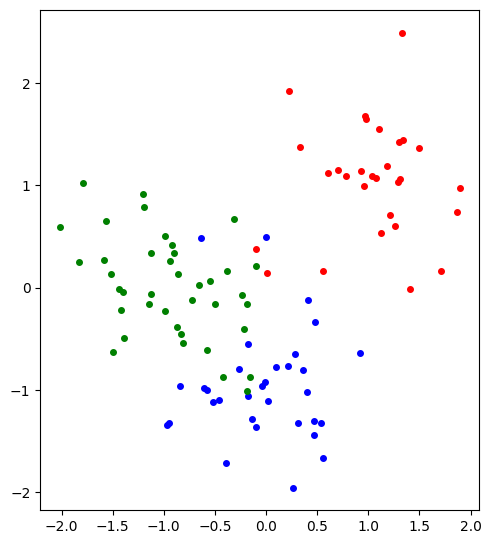

In [14]:
fig,ax = plot.subplots(figsize=(6.5,6.5))
ax.set_aspect('equal')

for t, pointL in byType:
	x,y = UnZip(pointL)
	plot.plot(x,y, 'o', markersize=4, color=colorL[t])
	
plot.savefig(dataPath + 'GenData.png')

In [18]:
print(len(type_))
print(len(loc))

np.save(dataPath+"2D_GroupsData_X.npy", np.array(loc))
np.save(dataPath+"2D_GroupsData_Y.npy", np.array(type_))

100
100
